In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

%matplotlib inline

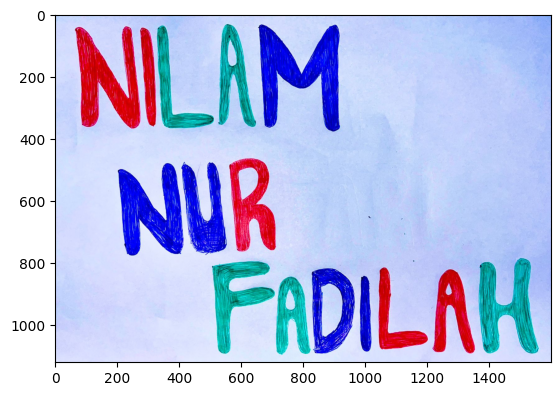

In [9]:
color_image = img.imread('nilm.jpeg')
plt.imshow(color_image)

(-0.5, 1599.5, 1119.5, -0.5)

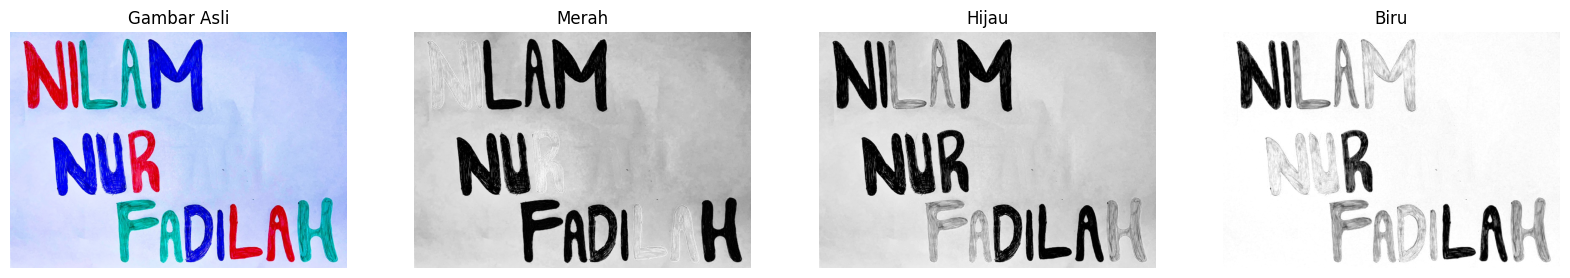

In [21]:
r = color_image[:, :, 0] 
g = color_image[:, :, 1] 
b = color_image[:, :, 2]

f, (c1, c2, c3, c4) = plt.subplots(1, 4, figsize = (20,10))

c1.set_title('Gambar Asli')
c1.imshow(color_image) 
c1.axis('off')

c2.set_title('Merah') 
c2.imshow(r, cmap="gray") 
c2.axis('off')

c3.set_title('Hijau') 
c3.imshow(g, cmap="gray") 
c3.axis('off')

c4.set_title('Biru') 
c4.imshow(b, cmap="gray")
c4.axis('off')

In [14]:
color_image = cv2.imread('nilm.jpeg')

In [15]:
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

In [22]:
histogram_biru = cv2.calcHist([b], [0], None, [256], [0, 256])
histogram_hijau = cv2.calcHist([g],[0], None,[256],[0,256])
histogram_merah = cv2.calcHist([r], [0], None,[256],[0,256])
histogram_warna = cv2.calcHist([color_image], [0,1,2],None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

(0.0, 256.0)

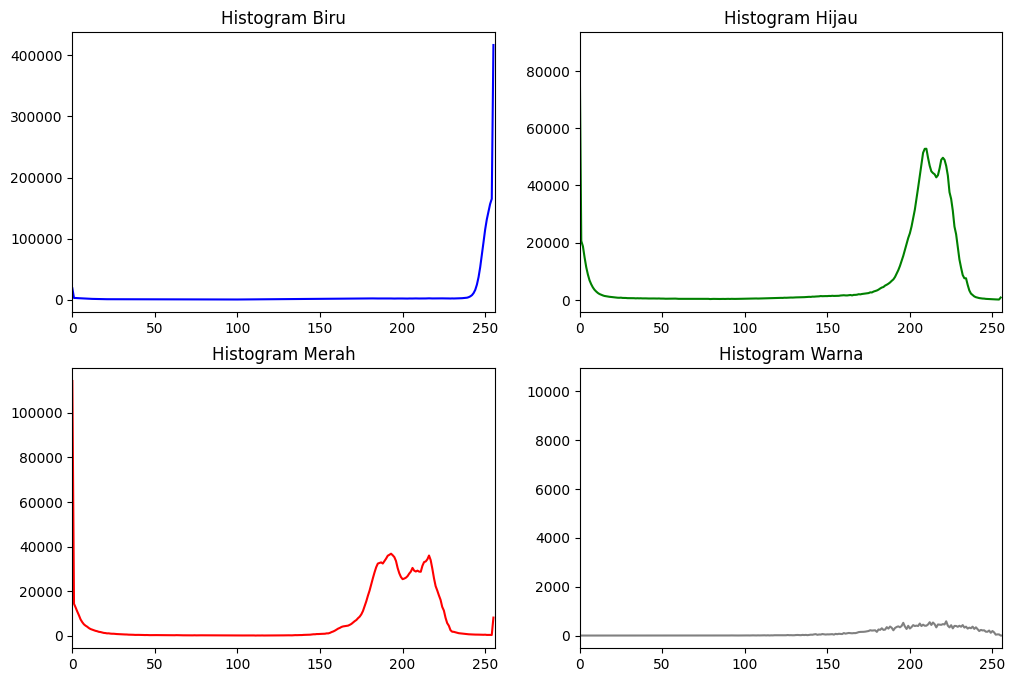

In [23]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1) 
plt.plot(histogram_biru, color='b')
plt.title( 'Histogram Biru')
plt.xlim([0, 256])

plt.subplot (2, 2, 2)
plt.plot(histogram_hijau, color='g')
plt.title( 'Histogram Hijau')
plt.xlim([0, 256])

plt.subplot (2, 2, 3) 
plt.plot(histogram_merah, color='r')
plt.title( 'Histogram Merah')
plt.xlim([0, 256])

plt.subplot (2, 2, 4)
plt.plot(histogram_warna.flatten(), color='gray')
plt.title('Histogram Warna')
plt.xlim([0, 256])

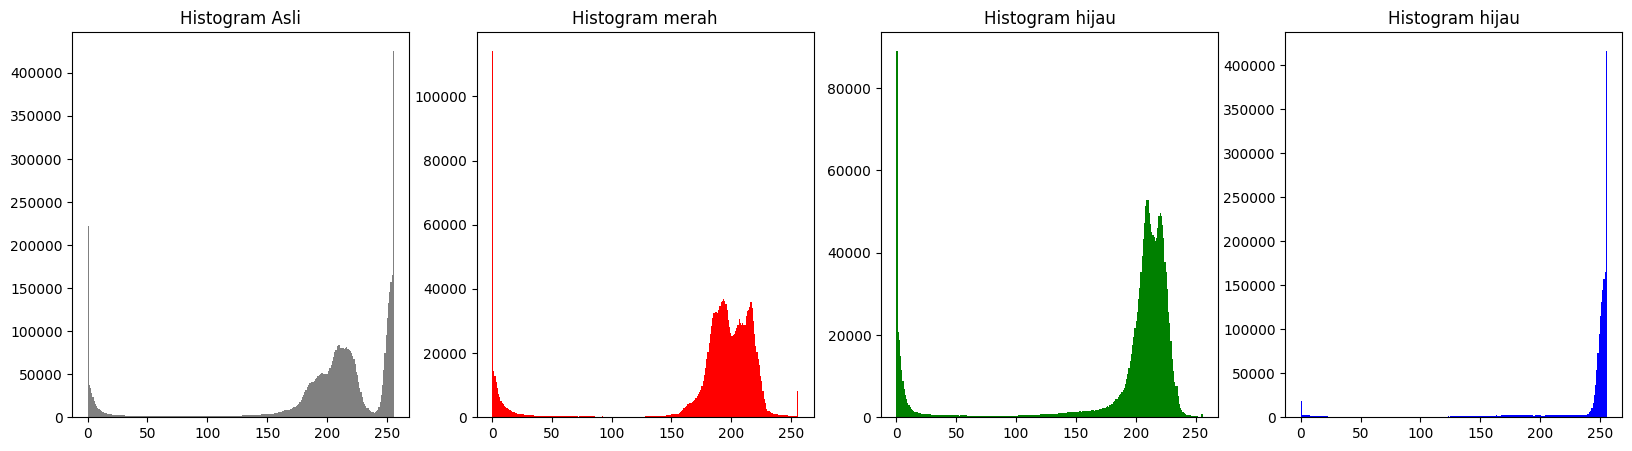

In [24]:
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.title('Histogram Asli')
plt.hist(color_image.flatten(), bins=256, range=[0,256], color='gray')

plt.subplot(142)
plt.title('Histogram merah')
plt.hist(r.flatten(), bins=256, range=[0,256], color='r')

plt.subplot(143)
plt.title('Histogram hijau')
plt.hist(g.flatten(), bins=256, range=[0,256], color='g')

plt.subplot(144)
plt.title('Histogram hijau')
plt.hist(b.flatten(), bins=256, range=[0,256], color='b')

plt.show()

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

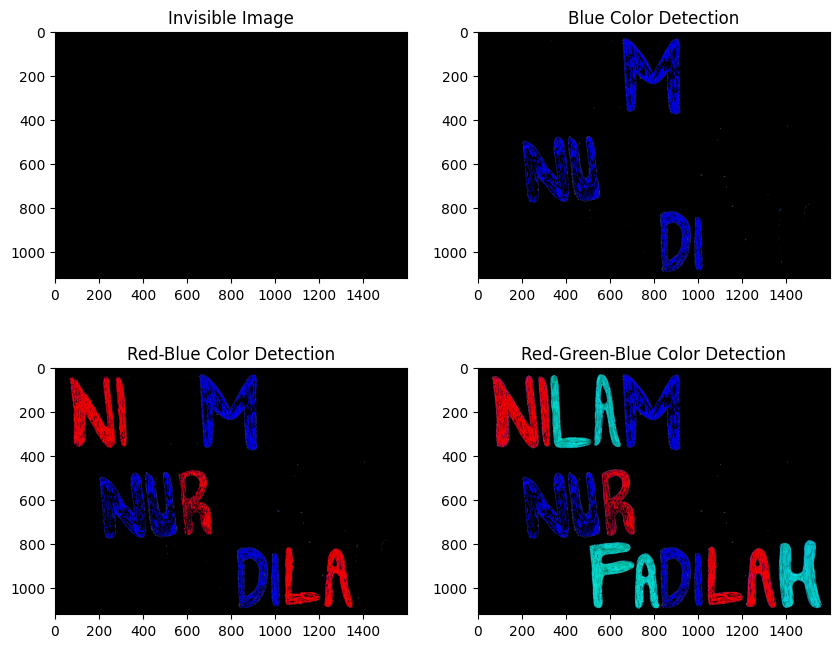

In [26]:
def make_image_invisible(image):
    height, width = image.shape[:2]
    return np.zeros((height, width, 3), dtype=np.uint8)

def increase_brightness(image, value=30):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v += value
    v = np.clip(v, 0, 255)
    final_hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

def detect_and_highlight_blue(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([130, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    result = cv2.bitwise_and(image, image, mask=blue_mask)
    return result

def detect_and_highlight_red_blue(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    red_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])
    red_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)
    
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([130, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    combined_mask = cv2.bitwise_or(red_mask, blue_mask)
    result = cv2.bitwise_and(image, image, mask=combined_mask)
    return result

def detect_and_highlight_red_green_blue(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    red_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])
    red_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)
    
    lower_green = np.array([40, 50, 50])
    upper_green = np.array([200, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)
    
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([130, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    combined_mask = cv2.bitwise_or(red_mask, cv2.bitwise_or(green_mask, blue_mask))
    result = cv2.bitwise_and(image, image, mask=combined_mask)
    return result

image = cv2.imread('nilm.jpeg')
invisible_image = make_image_invisible(image)
brightened_image = increase_brightness(image)
blue_detection = detect_and_highlight_blue(brightened_image)
red_blue_detection = detect_and_highlight_red_blue(brightened_image)
red_green_blue_detection = detect_and_highlight_red_green_blue(brightened_image)

plt.figure(figsize=(10, 8))

plt.subplot(221), plt.imshow(cv2.cvtColor(invisible_image, cv2.COLOR_BGR2RGB)), plt.title('Invisible Image')
plt.subplot(222), plt.imshow(cv2.cvtColor(blue_detection, cv2.COLOR_BGR2RGB)), plt.title('Blue Color Detection')
plt.subplot(223), plt.imshow(cv2.cvtColor(red_blue_detection, cv2.COLOR_BGR2RGB)), plt.title('Red-Blue Color Detection')
plt.subplot(224), plt.imshow(cv2.cvtColor(red_green_blue_detection, cv2.COLOR_BGR2RGB)), plt.title('Red-Green-Blue Color Detection')

plt.show()